The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


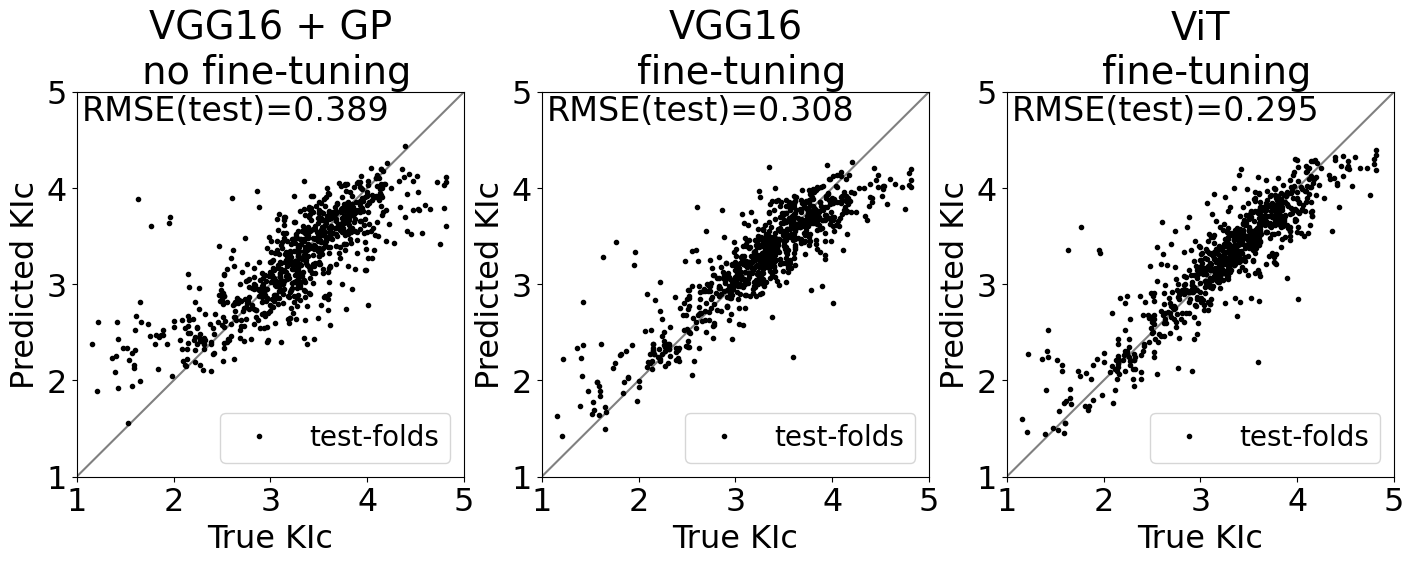

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle as pkl

f = open("./Analysis/Y_pred_rational_seed42_Stratified.pkl","rb")
plot_Y_rational = pkl.load(f)
f.close()
oof = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed42_oof_df.csv')
oof2 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed42_oof_df.csv')

TK, PK = oof['KIc'], oof['preds']
TKv, PKv = oof2['KIc'], oof2['preds']

plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 23

plt.subplot(1,3,1)
plt.plot([1,5],[1,5],"-",c="gray")
plt.plot(plot_Y_rational[0][3], plot_Y_rational[1][3],".",c="black",label="test-folds")
plt.xlabel("True KIc")
plt.ylabel("Predicted KIc")
plt.title("VGG16 + GP\n no fine-tuning")
plt.legend(loc="lower right",fontsize=20)
plt.xlim(1,5)
plt.ylim(1,5)
plt.text(1.05, 4.7, "RMSE(test)="+str(str(np.sqrt(np.mean((plot_Y_rational[0][3] - plot_Y_rational[1][3])**2)))[:5]), size=24, color="black")

plt.subplot(1,3,2)
plt.plot([1,5],[1,5],"-",c="gray")
plt.plot(TK, PK,".",c="black",label="test-folds")
plt.xlabel("True KIc")
plt.ylabel("Predicted KIc")
plt.title("VGG16\n fine-tuning")
plt.legend(loc="lower right",fontsize=20)
plt.xlim(1,5)
plt.ylim(1,5)
plt.text(1.05, 4.7, "RMSE(test)="+str(np.sqrt(np.mean((TK - PK)**2)))[:5], size=24, color="black")

plt.subplot(1,3,3)
plt.plot([1,5],[1,5],"-",c="gray")
plt.plot(TKv, PKv,".",c="black",label="test-folds")
plt.xlabel("True KIc")
plt.ylabel("Predicted KIc")
plt.title("ViT\n fine-tuning")
plt.legend(loc="lower right",fontsize=20)
plt.xlim(1,5)
plt.ylim(1,5)
plt.text(1.05, 4.7, "RMSE(test)="+str(np.sqrt(np.mean((TKv - PKv)**2)))[:5], size=24, color="black")

plt.savefig('./figure/GGplot.eps', bbox_inches="tight", pad_inches=0.05)

plt.show()

In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f = open("./VGG+GP/Y_pred_rational_seed42_Stratified.pkl","rb")
plot_Y_rational = pkl.load(f)
f.close()
oof = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed42_oof_df.csv')
oof2 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed42_oof_df.csv')

oof['vgg_diff'] = abs(oof['preds'] - oof['KIc'])
oof2['vit_diff'] = abs(oof2['preds'] - oof2['KIc'])
vgg_gp = abs(plot_Y_rational[0][3] - plot_Y_rational[1][3])

plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 17

plt.subplot(1,3,1)
plt.plot(oof2['KIc'], (oof['vgg_diff'] - oof2['vit_diff']),".", c="blue")
plt.plot([-1,5],[0,0],"-",c="black")
plt.xlabel("True KIc")
plt.ylabel("VGG_diff - ViT_diff")
plt.xlim(1, 5)
plt.ylim(-2, 2)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([-2, -1, 0, 1, 2])
plt.gca().set_aspect("equal")

plt.subplot(1,3,2)
plt.plot(oof2['KIc'], vgg_gp - oof['vgg_diff'],".", c="blue")
plt.plot([-1,5],[0,0],"-",c="black")
plt.xlabel("True KIc")
plt.ylabel("VGG+GP_diff - VGG_diff")
plt.xlim(1, 5)
plt.ylim(-2, 2)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([-2, -1, 0, 1, 2])
plt.gca().set_aspect("equal")

plt.subplot(1,3,3)
plt.plot(oof2['KIc'], vgg_gp - oof2['vit_diff'],".", c="blue")
plt.plot([-1,5],[0,0],"-",c="black")
plt.plot([-1,5],[0.5,0.5],"-",c="black")
plt.plot([-1,5],[-0.3,-0.3],"-",c="black")
plt.xlabel("True KIc")
plt.ylabel("VGG+GP_diff - ViT_diff")
plt.xlim(1, 5)
plt.ylim(-2, 2)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([-2, -1, 0, 1, 2])
plt.gca().set_aspect("equal")

plt.savefig('./figure/diff.eps', bbox_inches="tight", pad_inches=1)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './KIc/vgg/vgg16_StratifiedKfold_seed42_oof_df.csv'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


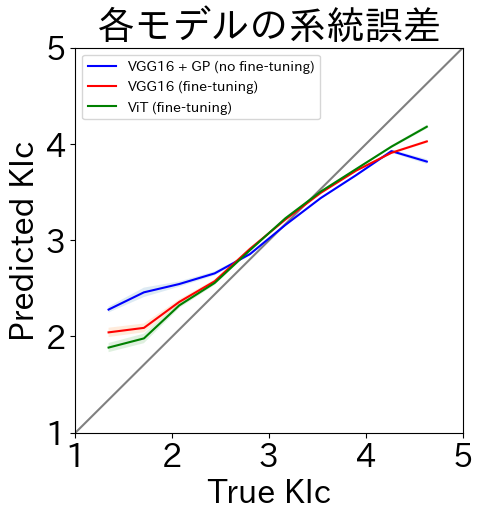

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import pickle as pkl

# 読み取り
OUTPUT_DIR = './KIc/vgg/'

## vgg
vgg_oof = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed42_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vgg_oof2 = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed10_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vgg_oof3 = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed20_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vgg_oof4 = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed51_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vgg_oof5 = pd.read_csv('./KIc/vgg/vgg16_StratifiedKfold_seed111_oof_df.csv').sort_values(by='Id').reset_index(drop=True)

## vit
vit_oof = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed42_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof2 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed10_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof3 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed20_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof4 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed51_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof5 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed111_oof_df.csv').sort_values(by='Id').reset_index(drop=True)

## vgg+GP
f = open("./Analysis/Y_pred_rational_seed42_Stratified.pkl","rb")
plot_Y_rational42 = pkl.load(f)
f.close()
f = open("./Analysis/Y_pred_rational_seed10_Stratified.pkl","rb")
plot_Y_rational10 = pkl.load(f)
f.close()
f = open("./Analysis/Y_pred_rational_seed20_Stratified.pkl","rb")
plot_Y_rational20 = pkl.load(f)
f.close()
f = open("./Analysis/Y_pred_rational_seed51_Stratified.pkl","rb")
plot_Y_rational51 = pkl.load(f)
f.close()
f = open("./Analysis/Y_pred_rational_seed111_Stratified.pkl","rb")
plot_Y_rational111 = pkl.load(f)
f.close()

## vgg 
true_kic = vgg_oof['KIc']  
predicted_kic = vgg_oof['preds']  

true_kic2 = vgg_oof2['KIc']  
predicted_kic2 = vgg_oof2['preds']  

true_kic3 = vgg_oof3['KIc']  
predicted_kic3 = vgg_oof3['preds']  

true_kic4 = vgg_oof4['KIc']  
predicted_kic4 = vgg_oof4['preds']  

true_kic5 = vgg_oof5['KIc']  
predicted_kic5 = vgg_oof5['preds']  

## vit
true_kic_vit = vit_oof['KIc']  
predicted_kic_vit = vit_oof['preds']  

true_kic_vit2 = vit_oof2['KIc']  
predicted_kic_vit2 = vit_oof2['preds']  

true_kic_vit3 = vit_oof3['KIc']  
predicted_kic_vit3 = vit_oof3['preds']  

true_kic_vit4 = vit_oof4['KIc']  
predicted_kic_vit4 = vit_oof4['preds']  

true_kic_vit5 = vit_oof5['KIc']  
predicted_kic_vit5 = vit_oof5['preds']  

## VGG + GP
true_kic_vgg_gau = pd.Series(plot_Y_rational42[0][3])  
predicted_kic_vgg_gau = pd.Series(plot_Y_rational42[1][3])  

true_kic_vgg_gau2 = pd.Series(plot_Y_rational10[0][3])  
predicted_kic_vgg_gau2 = pd.Series(plot_Y_rational10[1][3])  

true_kic_vgg_gau3 = pd.Series(plot_Y_rational20[0][3])  
predicted_kic_vgg_gau3 = pd.Series(plot_Y_rational20[1][3])  

true_kic_vgg_gau4 = pd.Series(plot_Y_rational51[0][3])  
predicted_kic_vgg_gau4 = pd.Series(plot_Y_rational51[1][3])  

true_kic_vgg_gau5 = pd.Series(plot_Y_rational111[0][3])  
predicted_kic_vgg_gau5 = pd.Series(plot_Y_rational111[1][3]) 
    
     
# 区切りの数
num_bins = 10

# 区切りの幅を計算
bin_width = (np.max(true_kic) - np.min(true_kic)) / num_bins

# 区切りごとにPredicted KICの平均値を計算
bin_centers = []
predicted_kic_means = []
predicted_kic_means_vit = []
predicted_kic_means_vgg_gau = []
predicted_kic_std = []
predicted_kic_std_vit = []
predicted_kic_std_vgg_gau = []

for i in range(num_bins):
    bin_lower = np.min(true_kic) + i * bin_width
    bin_upper = bin_lower + bin_width
    
    bin_mask = (true_kic >= bin_lower) & (true_kic < bin_upper)
    bin_true_kic = pd.concat([true_kic[bin_mask],true_kic2[bin_mask],true_kic3[bin_mask],true_kic4[bin_mask],true_kic5[bin_mask]], ignore_index=True, axis=0)
    bin_predicted_kic = pd.concat([predicted_kic[bin_mask],predicted_kic2[bin_mask],predicted_kic3[bin_mask],predicted_kic4[bin_mask],predicted_kic5[bin_mask]], ignore_index=True, axis=0)
    bin_centers.append((bin_lower + bin_upper) / 2)
    predicted_kic_means.append(np.mean(bin_predicted_kic))
    predicted_kic_std.append(bin_predicted_kic.std(ddof=0) / np.sqrt(len(bin_predicted_kic)))
    
    bin_mask_vit = (true_kic_vit >= bin_lower) & (true_kic_vit < bin_upper)
    bin_true_kic_vit = pd.concat([true_kic_vit[bin_mask_vit],true_kic_vit2[bin_mask_vit],true_kic_vit3[bin_mask_vit],true_kic_vit4[bin_mask_vit],true_kic_vit5[bin_mask_vit]], ignore_index=True, axis=0)
    bin_predicted_kic_vit = pd.concat([predicted_kic_vit[bin_mask_vit],predicted_kic_vit2[bin_mask_vit],predicted_kic_vit3[bin_mask_vit],predicted_kic_vit4[bin_mask_vit],predicted_kic_vit5[bin_mask_vit]], ignore_index=True, axis=0)
    predicted_kic_means_vit.append(np.mean(bin_predicted_kic_vit))
    predicted_kic_std_vit.append(bin_predicted_kic_vit.std(ddof=0) / np.sqrt(len(bin_predicted_kic_vit)))
    
    bin_mask_vgg_gau = (true_kic_vgg_gau >= bin_lower) & (true_kic_vgg_gau < bin_upper)
    bin_mask_vgg_gau2 = (true_kic_vgg_gau2 >= bin_lower) & (true_kic_vgg_gau2 < bin_upper)
    bin_mask_vgg_gau3 = (true_kic_vgg_gau3 >= bin_lower) & (true_kic_vgg_gau3 < bin_upper)
    bin_mask_vgg_gau4 = (true_kic_vgg_gau4 >= bin_lower) & (true_kic_vgg_gau4 < bin_upper)
    bin_mask_vgg_gau5 = (true_kic_vgg_gau5 >= bin_lower) & (true_kic_vgg_gau5 < bin_upper)
    bin_true_kic_vgg_gau = np.concatenate([true_kic_vgg_gau[bin_mask_vgg_gau],true_kic_vgg_gau2[bin_mask_vgg_gau2],true_kic_vgg_gau3[bin_mask_vgg_gau3],true_kic_vgg_gau4[bin_mask_vgg_gau4],true_kic_vgg_gau5[bin_mask_vgg_gau5]], axis=0)
    bin_predicted_kic_vgg_gau = np.concatenate([predicted_kic_vgg_gau[bin_mask_vgg_gau],predicted_kic_vgg_gau2[bin_mask_vgg_gau2],predicted_kic_vgg_gau3[bin_mask_vgg_gau3],predicted_kic_vgg_gau4[bin_mask_vgg_gau4],predicted_kic_vgg_gau5[bin_mask_vgg_gau5]], axis=0)
    predicted_kic_means_vgg_gau.append(np.mean(bin_predicted_kic_vgg_gau))
    predicted_kic_std_vgg_gau.append(bin_predicted_kic_vgg_gau.std(ddof=0) / np.sqrt(len(bin_predicted_kic_vgg_gau)))

plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 23

plt.figure(figsize=(5, 5))
plt.plot([1,5],[1,5],"-",c="gray")
plt.plot(bin_centers, predicted_kic_means_vgg_gau, 'b-', label='VGG16 + GP (no fine-tuning)')
plt.fill_between(bin_centers, predicted_kic_means_vgg_gau+np.array(predicted_kic_std_vgg_gau), predicted_kic_means_vgg_gau-np.array(predicted_kic_std_vgg_gau), alpha=0.15)
plt.plot(bin_centers, predicted_kic_means, 'r-', label='VGG16 (fine-tuning)')
plt.fill_between(bin_centers, predicted_kic_means+np.array(predicted_kic_std), predicted_kic_means-np.array(predicted_kic_std), alpha=0.15)
plt.plot(bin_centers, predicted_kic_means_vit, 'g-', label='ViT (fine-tuning)')
plt.fill_between(bin_centers, predicted_kic_means_vit+np.array(predicted_kic_std_vit), predicted_kic_means_vit-np.array(predicted_kic_std_vit), alpha=0.15)

plt.xlabel("True KIc")
plt.ylabel("Predicted KIc")
plt.title("各モデルの系統誤差")
plt.legend(loc="upper left",fontsize=10)
plt.xlim(1,5)
plt.ylim(1,5)
plt.savefig('./figure/average_grit_plot.eps', bbox_inches="tight", pad_inches=0.05)
plt.show()


/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.

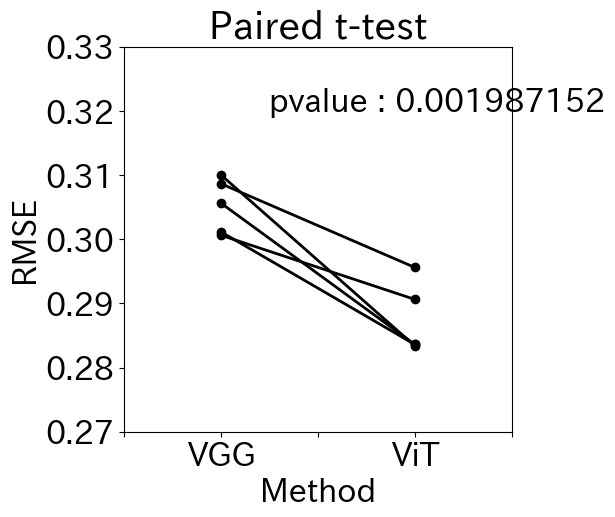

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy import stats

vgg_rmse = []
vit_rmse = []

vgg_rmse.append(mean_squared_error(vgg_oof['KIc'], vgg_oof['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof['KIc'], vit_oof['preds'], squared=False))

vgg_rmse.append(mean_squared_error(vgg_oof2['KIc'], vgg_oof2['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof2['KIc'], vit_oof2['preds'], squared=False))

vgg_rmse.append(mean_squared_error(vgg_oof3['KIc'], vgg_oof3['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof3['KIc'], vit_oof3['preds'], squared=False))

vgg_rmse.append(mean_squared_error(vgg_oof4['KIc'], vgg_oof4['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof4['KIc'], vit_oof4['preds'], squared=False))

vgg_rmse.append(mean_squared_error(vgg_oof5['KIc'], vgg_oof5['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof5['KIc'], vit_oof5['preds'], squared=False))

results = stats.ttest_rel(vgg_rmse, vit_rmse, alternative='greater')

# データの作成
data = pd.DataFrame({
    'Method': ['VGG'] * 5 + ['ViT'] * 5,
    'RMSE': vgg_rmse + vit_rmse
})

# 箱ひげ図と点を結ぶグラフの描画
plt.figure(figsize=(5, 5))

plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 23 

x = 1.5
y = 0.32
s = f"pvalue : {results.pvalue:.9f}"
plt.text(x, y, s)

plt.xticks([0, 1, 2, 3, 4], ['', 'VGG', '', 'ViT', ''])
# 各点を結ぶ線の描画
for i in range(0, 5):
    method1 = data['RMSE'][i]
    method2 = data['RMSE'][i+5]
    plt.plot([1, 3], [method1, method2], color="black", marker='.', markersize=12, linestyle="-", linewidth=2)   

# グラフの装飾
plt.xlabel("Method")
plt.ylabel("RMSE")
plt.ylim(0.27, 0.33)
plt.xlim(0, 4)
plt.title("Paired t-test")
plt.savefig('./figure/paired_ttest.eps', bbox_inches="tight", pad_inches=0.05)
plt.show()


TtestResult(statistic=3.3540605406461093, pvalue=0.014230649002693371, df=4)


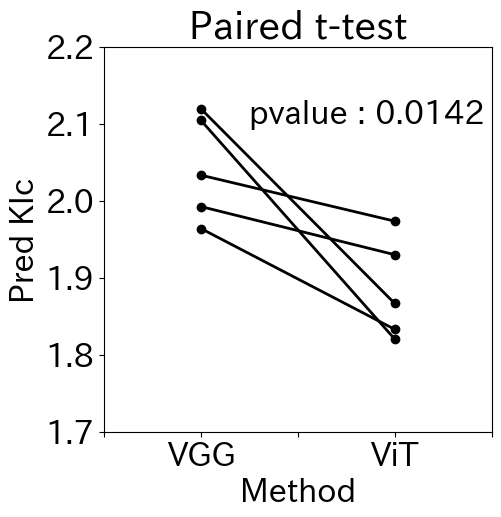

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bin_lower_min = np.min(true_kic) 
bin_upper_min = bin_lower_min + bin_width
bin_mask_min = (true_kic >= bin_lower_min) & (true_kic < bin_upper_min)

vgg_true_min = true_kic[bin_mask_min]
vgg_pred_min = predicted_kic[bin_mask_min]
vit_true_min = true_kic_vit[bin_mask_min]
vit_pred_min = predicted_kic_vit[bin_mask_min]

vgg_true_min2 = true_kic2[bin_mask_min]
vgg_pred_min2 = predicted_kic2[bin_mask_min]
vit_true_min2 = true_kic_vit2[bin_mask_min]
vit_pred_min2 = predicted_kic_vit2[bin_mask_min]

vgg_true_min3 = true_kic3[bin_mask_min]
vgg_pred_min3 = predicted_kic3[bin_mask_min]
vit_true_min3 = true_kic_vit3[bin_mask_min]
vit_pred_min3 = predicted_kic_vit3[bin_mask_min]

vgg_true_min4 = true_kic4[bin_mask_min]
vgg_pred_min4 = predicted_kic4[bin_mask_min]
vit_true_min4 = true_kic_vit4[bin_mask_min]
vit_pred_min4 = predicted_kic_vit4[bin_mask_min]

vgg_true_min5 = true_kic5[bin_mask_min]
vgg_pred_min5 = predicted_kic5[bin_mask_min]
vit_true_min5 = true_kic_vit5[bin_mask_min]
vit_pred_min5 = predicted_kic_vit5[bin_mask_min]

vit_pred = [np.mean(vit_pred_min), np.mean(vit_pred_min2), np.mean(vit_pred_min3), np.mean(vit_pred_min4), np.mean(vit_pred_min5)]
vgg_pred = [np.mean(vgg_pred_min), np.mean(vgg_pred_min2), np.mean(vgg_pred_min3), np.mean(vgg_pred_min4), np.mean(vgg_pred_min5)]

results = stats.ttest_rel(vgg_pred, vit_pred, alternative='greater')
print(results)

# データの作成
data = pd.DataFrame({
    'Method': ['VGG'] * 5 + ['ViT'] * 5,
    'Pred KIc': np.concatenate([vgg_pred, vit_pred], 0)
})

# 箱ひげ図と点を結ぶグラフの描画
plt.figure(figsize=(5, 5))
plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 23 

x = 1.5
y = 2.1
s = f"pvalue : {results.pvalue:.4f}"
plt.text(x, y, s)

plt.xticks([0, 1, 2, 3, 4], ['', 'VGG', '', 'ViT', ''])
# 各点を結ぶ線の描画
for i in range(0, 5):
    method1 = vgg_pred[i]
    method2 = vit_pred[i]
    plt.plot([1, 3], [method1, method2], color="black", marker='.', markersize=12, linestyle="-", linewidth=2)   

# グラフの装飾
plt.xlabel("Method")
plt.ylabel("Pred KIc")
plt.ylim(1.7, 2.2)
plt.xlim(0, 4)
plt.title("Paired t-test")
plt.savefig('./figure/paired_ttest.eps', bbox_inches="tight", pad_inches=0.05)
plt.show()


In [ ]:
vgg_pred

[1.962643825, 1.8945850550000003, 1.94592688, 2.007533075, 1.9405641149999997]

In [ ]:
vit_pred

[2.0053198799999996,
 1.8208899450000005,
 1.86163736,
 1.850343795,
 1.8534600950000002]

TtestResult(statistic=-3.2289775471633133, pvalue=0.016003283078423535, df=4)


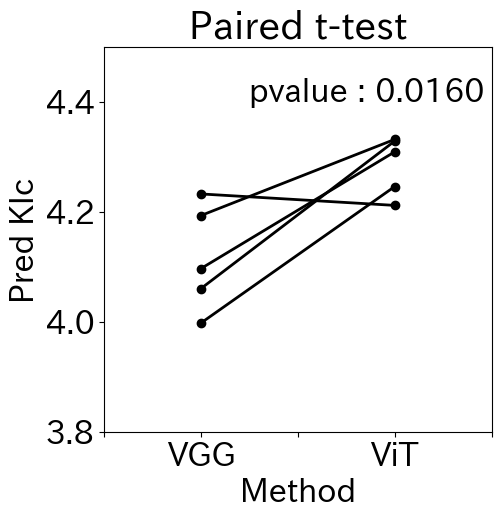

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bin_lower_max = np.min(true_kic) + num_bins * bin_width
bin_upper_max = bin_lower_max + bin_width
bin_mask_max = (true_kic >= bin_lower_max) & (true_kic < bin_upper_max)

vgg_true_max = true_kic[bin_mask_max]
vgg_pred_max = predicted_kic[bin_mask_max]
vit_true_max = true_kic_vit[bin_mask_max]
vit_pred_max = predicted_kic_vit[bin_mask_max]

vgg_true_max2 = true_kic2[bin_mask_max]
vgg_pred_max2 = predicted_kic2[bin_mask_max]
vit_true_max2 = true_kic_vit2[bin_mask_max]
vit_pred_max2 = predicted_kic_vit2[bin_mask_max]

vgg_true_max3 = true_kic3[bin_mask_max]
vgg_pred_max3 = predicted_kic3[bin_mask_max]
vit_true_max3 = true_kic_vit3[bin_mask_max]
vit_pred_max3 = predicted_kic_vit3[bin_mask_max]

vgg_true_max4 = true_kic4[bin_mask_max]
vgg_pred_max4 = predicted_kic4[bin_mask_max]
vit_true_max4 = true_kic_vit4[bin_mask_max]
vit_pred_max4 = predicted_kic_vit4[bin_mask_max]

vgg_true_max5 = true_kic5[bin_mask_max]
vgg_pred_max5 = predicted_kic5[bin_mask_max]
vit_true_max5 = true_kic_vit5[bin_mask_max]
vit_pred_max5 = predicted_kic_vit5[bin_mask_max]

vit_pred = [np.mean(vit_pred_max), np.mean(vit_pred_max2), np.mean(vit_pred_max3), np.mean(vit_pred_max4), np.mean(vit_pred_max5)]
vgg_pred = [np.mean(vgg_pred_max), np.mean(vgg_pred_max2), np.mean(vgg_pred_max3), np.mean(vgg_pred_max4), np.mean(vgg_pred_max5)]

results = stats.ttest_rel(vgg_pred, vit_pred, alternative='less')
print(results)
# データの作成
data = pd.DataFrame({
    'Method': ['VGG'] * 5 + ['ViT'] * 5,
    'Pred KIc': np.concatenate([vgg_pred, vit_pred], 0)
})

# 箱ひげ図と点を結ぶグラフの描画
plt.figure(figsize=(5, 5))

plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 23 

x = 1.5
y = 4.4
s = f"pvalue : {results.pvalue:.4f}"
plt.text(x, y, s)

plt.xticks([0, 1, 2, 3, 4], ['', 'VGG', '', 'ViT', ''])
# 各点を結ぶ線の描画
for i in range(0, 5):
    method1 = vgg_pred[i]
    method2 = vit_pred[i]
    plt.plot([1, 3], [method1, method2], color="black", marker='.', markersize=12, linestyle="-", linewidth=2)   

# グラフの装飾
plt.xlabel("Method")
plt.ylabel("Pred KIc")
plt.ylim(3.8, 4.5)
plt.xlim(0, 4)
plt.title("Paired t-test")
plt.savefig('./figure/paired_ttest.eps', bbox_inches="tight", pad_inches=0.05)
plt.show()


In [ ]:
vgg_pred

[4.145761333333334, 4.0824124, 4.000710166666667, 4.298530966666667, 4.1784602]

In [ ]:
vit_pred

[4.221548333333334,
 4.2284839666666665,
 4.289200133333334,
 4.150399133333333,
 4.235464833333334]

/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/sklearn/metrics/_regression.

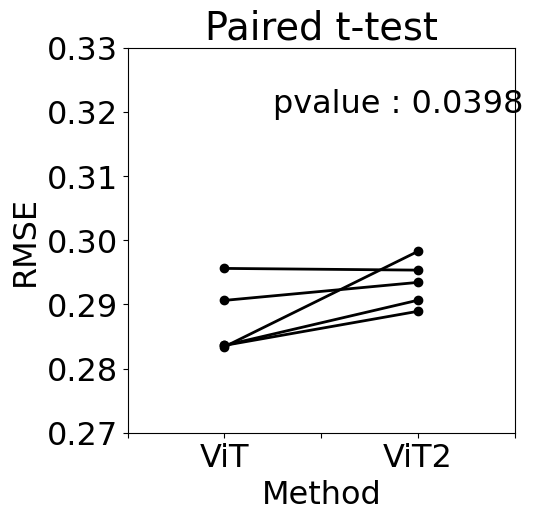

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy import stats

## vit
vit_oof = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed42_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof2 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed10_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof3 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed20_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof4 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed51_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit_oof5 = pd.read_csv('./KIc/vit/vit_large_patch32_224_StratifiedKfold_seed111_oof_df.csv').sort_values(by='Id').reset_index(drop=True)

## vit
vit2_oof = pd.read_csv('./KIc/vit/vit_large_patch32_224_seed42_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit2_oof2 = pd.read_csv('./KIc/vit/vit_large_patch32_224_seed10_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit2_oof3 = pd.read_csv('./KIc/vit/vit_large_patch32_224_seed20_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit2_oof4 = pd.read_csv('./KIc/vit/vit_large_patch32_224_seed51_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
vit2_oof5 = pd.read_csv('./KIc/vit/vit_large_patch32_224_seed111_oof_df.csv').sort_values(by='Id').reset_index(drop=True)


vit2_rmse = []
vit_rmse = []

vit2_rmse.append(mean_squared_error(vit2_oof['KIc'], vit2_oof['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof['KIc'], vit_oof['preds'], squared=False))

vit2_rmse.append(mean_squared_error(vit2_oof2['KIc'], vit2_oof2['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof2['KIc'], vit_oof2['preds'], squared=False))

vit2_rmse.append(mean_squared_error(vit2_oof3['KIc'], vit2_oof3['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof3['KIc'], vit_oof3['preds'], squared=False))

vit2_rmse.append(mean_squared_error(vit2_oof4['KIc'], vit2_oof4['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof4['KIc'], vit_oof4['preds'], squared=False))

vit2_rmse.append(mean_squared_error(vit2_oof5['KIc'], vit2_oof5['preds'], squared=False))
vit_rmse.append(mean_squared_error(vit_oof5['KIc'], vit_oof5['preds'], squared=False))

results = stats.ttest_rel(vit2_rmse, vit_rmse, alternative='greater')

# データの作成
data = pd.DataFrame({
    'Method': ['ViT'] * 5 + ['ViT2'] * 5,
    'RMSE': vit_rmse + vit2_rmse
})

# 箱ひげ図と点を結ぶグラフの描画
plt.figure(figsize=(5, 5))

plt.rcParams['figure.figsize'] = 17,5
plt.rcParams["font.size"] = 23 

x = 1.5
y = 0.32
s = f"pvalue : {results.pvalue:.4f}"
plt.text(x, y, s)

plt.xticks([0, 1, 2, 3, 4], ['', 'ViT', '', 'ViT2', ''])
# 各点を結ぶ線の描画
for i in range(0, 5):
    method1 = data['RMSE'][i]
    method2 = data['RMSE'][i+5]
    plt.plot([1, 3], [method1, method2], color="black", marker='.', markersize=12, linestyle="-", linewidth=2)   

# グラフの装飾
plt.xlabel("Method")
plt.ylabel("RMSE")
plt.ylim(0.27, 0.33)
plt.xlim(0, 4)
plt.title("Paired t-test")
plt.savefig('./figure/paired_ttest.eps', bbox_inches="tight", pad_inches=0.05)
plt.show()


In [ ]:
import cv2

# 画像を読み込む
image = cv2.imread('./KIc/imagedata/100095.jpg')

# ぼかしの初期化
kernel_size = 5
sigma = 1.0
increment = 0.5  # ぼかしを加える量の増分

for _ in range(10):  # ぼかしを10回適用する例
    # ガウシアンぼかしを適用
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

    # ぼかしを加えた画像を表示
    cv2.imshow('Blurred Image', blurred_image)
    cv2.waitKey(0)

    # ぼかしのパラメータを更新
    kernel_size += 2  # カーネルサイズを増加させる
    sigma += increment  # シグマを増加させる
